In [14]:
# library to load the MNIST dataset 
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X, y = mnist["data"], mnist["target"]

In [15]:
print(X.shape)

(70000, 784)


In [16]:
# tried to randomize the subset but did not work.
#import pandas as pd
#df = pd.DataFrame(X)
#df["target"] = y
#df_shuffled = df.sample(frac=1, random_state=42)


# this makes it so only a subset of 10,000 instances is used
subset_size = 10000
X_subset, y_subset = X[:subset_size], y[:subset_size]

In [17]:
# split the subset into training set and testing set
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(df_shuffled.drop("target", axis=1), df_shuffled["target"], test_size=0.2, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)

In [18]:
#libraries neccessary
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# pipelines for linear SVM
linear_svm_pipeline = Pipeline([
    ('standardScaler', StandardScaler()),
    ('linear_svc',LinearSVC())
])
# train the linear SVM classifier
linear_svm_pipeline.fit(X_train, y_train)


C:\Users\ac389110\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('standardScaler', StandardScaler()),
                ('linear_svc', LinearSVC())])

In [19]:
# make predicitions using the linear SVM classifier
y_pred_linear = linear_svm_pipeline.predict(X_test)

In [20]:
# library for accuracy score
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the linear SVM classifier 
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print("Linear SVC accuracy:", accuracy_linear)

Linear SVC accuracy: 0.8675


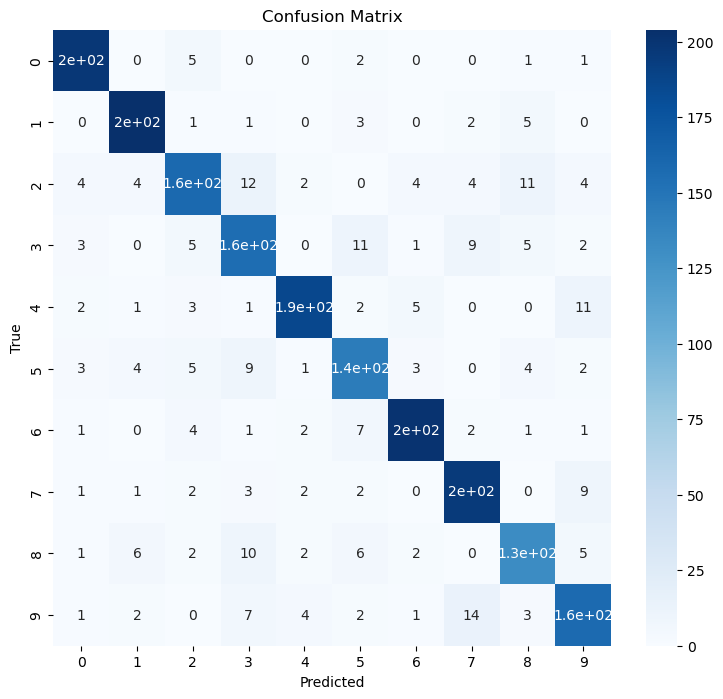

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_linear)

fig, ax = plt.subplots(figsize=(9, 8))
 #create a heatmap using seaborn
sns.heatmap(cm, annot=True, cmap='Blues')

#labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [22]:
# pipeline for RBF kernel
rbf_svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("rbf_svc", SVC(kernel="rbf", random_state=42))
])

# train the RBF kernel SVM classifier
rbf_svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rbf_svc', SVC(random_state=42))])

In [23]:
# make predicitons using the RBF kernel SVM classifiers
y_pred_rbf = rbf_svm_pipeline.predict(X_test)

In [24]:
# Calculate the accuracy of the RBf kernel SVM classifier
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print("RBF kernel SVC accuracy:", accuracy_rbf)

RBF kernel SVC accuracy: 0.938


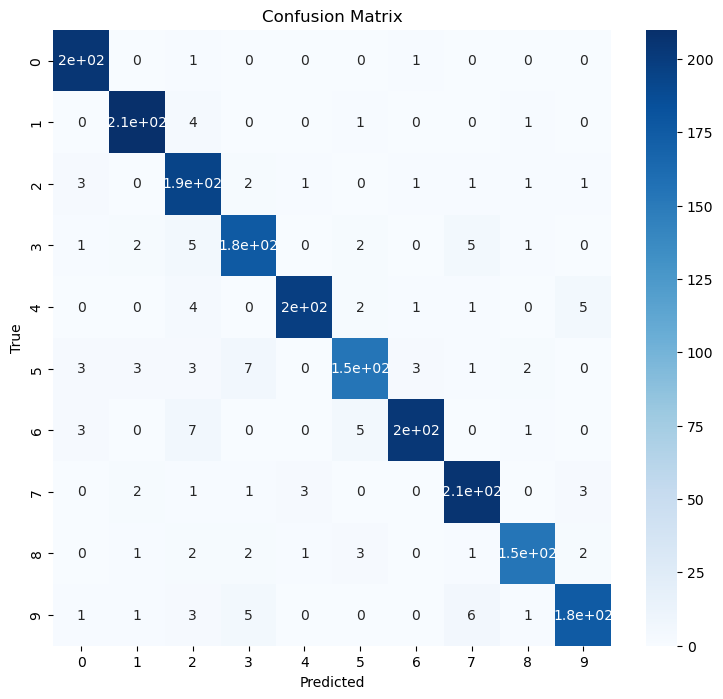

In [25]:
cm = confusion_matrix(y_test, y_pred_rbf)

fig, ax = plt.subplots(figsize=(9, 8))
 #create a heatmap using seaborn
sns.heatmap(cm, annot=True, cmap='Blues')

#labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()